# Project
## DATA 622
### Problem Overview
In this project, you will use real COVID-19 data to train machine learning models that can predict future numbers of confirmed cases, deaths, and recovered cases. While you have up-to-date COVID-19 data from the entire world at your disposal, the objective is to make accurate predictions for the 10 Canadian provinces and Canada as a whole (for recovered cases, there aren’t provincial data so only predict Canada as a whole). You are also welcome to pull in other data sources you think can help with the predictions. Keep in mind, however, that you need to include in your submission everything required to run your code. 

Unlike the assignments, you are asked to tell a data-driven story in a Jupyter notebook. While making accurate predictions through machine learning is an important part of this project, you will also need to clearly and convincingly communicate which information is most predictive, any patterns you identified in the data, your feature engineering strategy, and justification for your machine learning model design. Your notebook should tell the story step-by-step using both text and code, just like any good Jupyter notebook tutorial you would find online.


## Introduction and Data Preparation
To understand infection rates for COVID-19, it is important to begin with the first confirmed case of infection. In this analysis, we are most interested in the general slope with which the infection is increasing. Therefore, after we have loaded in the data, we will split it up into Canada and the rest of the world. For the purposes of explanation, and because they will occur earliest of our datapoints, we will investigate confirmed cases before going through the same steps in deaths and recoveries. 

### Exploring Covid Datasets



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dfconfirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")

# Diamond Princess in country
# MS Zaandam in country
# grand princess in province
dfconfirmed = dfconfirmed[dfconfirmed['Country/Region'] != 'Diamond Princess']
dfconfirmed = dfconfirmed[dfconfirmed['Country/Region'] != 'MS Zaandam']
dfconfirmed = dfconfirmed[dfconfirmed['Province/State'] != 'Grand Princess']

# print(dfconfirmed['Country/Region'])
# print(dfconfirmed.columns)

Then we can examine some exploratory figures: 

Below is a plot of the number of confirmed cases in all countries with data from January 22, 2020 onwards

Text(0, 0.5, 'Confirmed Cases')

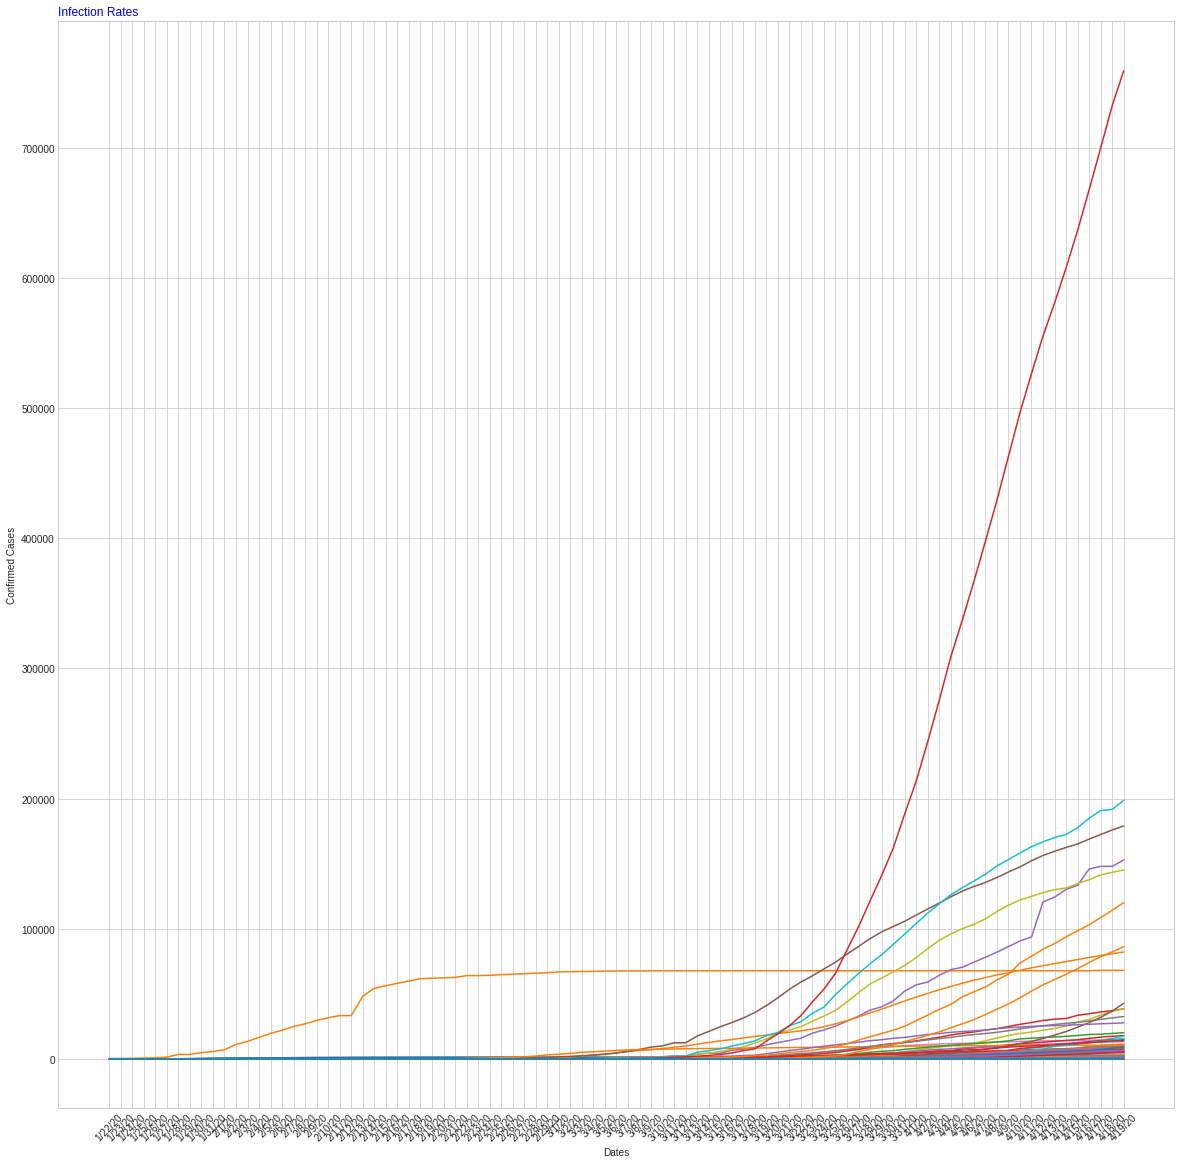

In [63]:
figdat = dfconfirmed.copy()
figdat = figdat.drop(['Province/State', 	'Country/Region', 	'Lat', 	'Long'], axis = 1)
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"]=20,20


# multiple line plot
for index, row in figdat.iterrows():
  #print(row['1/22/20':])
  plt.plot(figdat.columns, row['1/22/20':])#, marker='', color='grey', linewidth=1, alpha=0.4)

 
# Add titles
plt.xticks(rotation=45)
plt.title("Infection Rates", loc='left', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Dates")
plt.ylabel("Confirmed Cases")

# Adapted from: https://python-graph-gallery.com/123-highlight-a-line-in-line-plot/

However, if we isolate Canada and its provinces

Text(0, 0.5, 'Confirmed Cases')

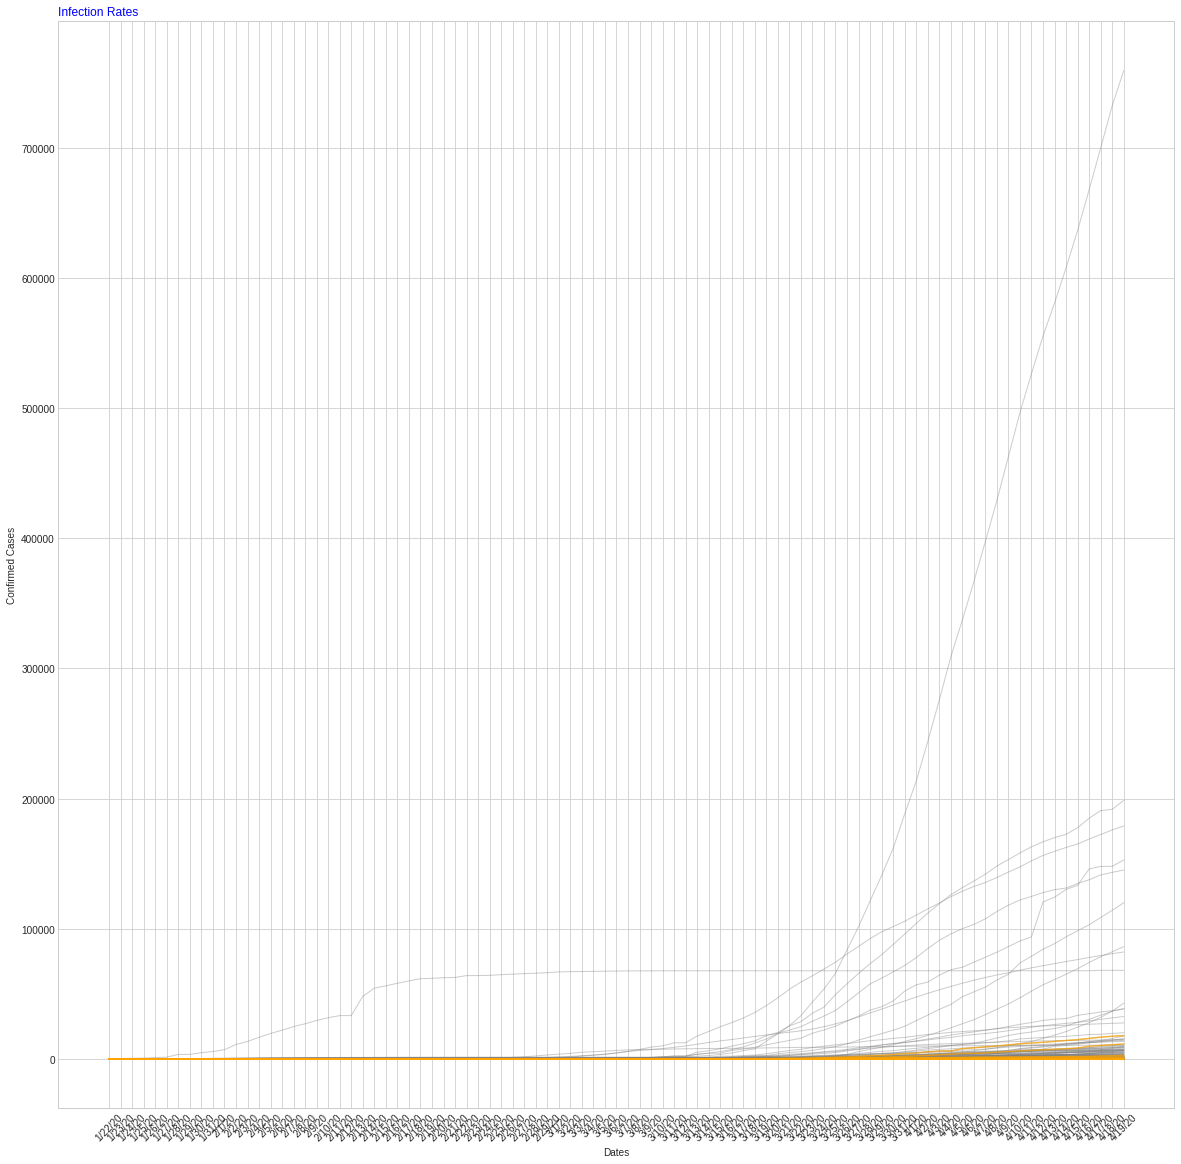

In [64]:
# multiple line plot
for index, row in figdat.iterrows():
  plt.plot(figdat.columns, row['1/22/20':], marker='', color='grey', linewidth=1, alpha=0.4)


for i in list(dfconfirmed.index[dfconfirmed['Country/Region'] == "Canada"]):
  figdat.iloc[i].plot(marker='', color='orange', linewidth=1.5, alpha=0.7)

plt.xticks(rotation=45)

plt.title("Infection Rates", loc='left', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Dates")
plt.ylabel("Confirmed Cases")




From these figures, we can see many dates where there were no infections, after which, the figures are cumulative, and that the relative numbers are very low in Canada. Therefore, we can remove data from before the first confirmed case. But to do so, we need to understand two important facets of the public's reaction to this pandemic: Canada, which we are trying to make informed decisions on, and the rest of the world started treating COVID-19 as a global pandemic on March 11 (https://nationalpost.com/news/world/its-official-the-covid-19-outbreak-is-a-global-pandemic), and implementing physical distancing on a large scale has already "flattened the curve" in many places. Therefore, it is most likely that more recent data is important in predicting future infections. 
While it is reasonable to remove the dates prior to the first case in a country, it remains important to include the number of days since the first confirmed case. Additionally, it would be prudent to include a slope measurement prior to the World Health Organisation's pandemic declaration. This way, we do not ignore that information, but treat it as a prior state. For example, if a country has an initial large spike in infections, or a slow increase, the model may value these differently. 

In [0]:
dfconfirmed = dfconfirmed.drop(['Lat', 'Long'], axis = 1)
dates = dfconfirmed.copy()

In [66]:
dates = dates.drop(['Province/State','Country/Region'], axis = 1)
dates.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24


In [0]:
# Days since first infection
df = dates.astype(float)
firstinfect = np.argmax(df.values!=0,axis=1)

#first infection as a calendar day of the year
firstinfect_doy = firstinfect + 22 # this would muck up the data because 0's mean they were there before the data was started

# Number of days prior to a Pandemic being called, where the first confirmed cases appear
# March 11th is day 71 of 2020
infectpriortopandemic = 71 - firstinfect

# print(infectpriortopandemic)

And if we perform these same calculations and figures for deaths and recovery: 

Text(0, 0.5, 'Confirmed Deaths')

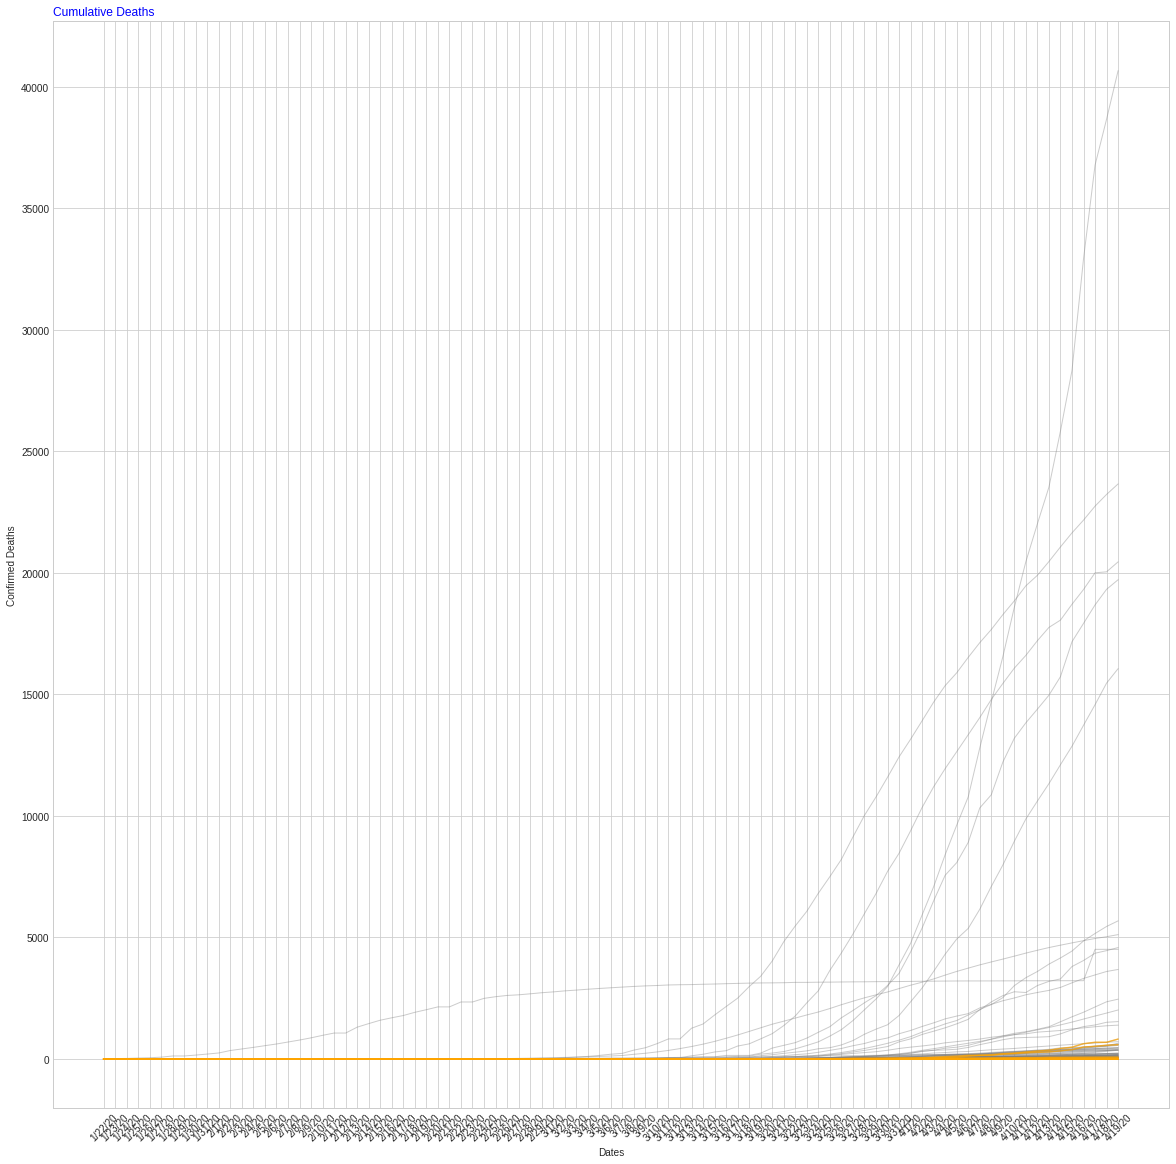

In [68]:
## Death
dfdeaths = pd.read_csv("time_series_covid19_deaths_global.csv")
dfdeaths = dfdeaths[dfdeaths['Country/Region'] != 'Diamond Princess']
dfdeaths = dfdeaths[dfdeaths['Country/Region'] != 'MS Zaandam']
dfdeaths = dfdeaths[dfdeaths['Province/State'] != 'Grand Princess']

figdat = dfdeaths.copy()
figdat = figdat.drop(['Province/State', 	'Country/Region', 	'Lat', 	'Long'], axis = 1)


## Figures

# multiple line plot
for index, row in figdat.iterrows():
  plt.plot(figdat.columns, row['1/22/20':], marker='', color='grey', linewidth=1, alpha=0.4)


for i in list(dfconfirmed.index[dfconfirmed['Country/Region'] == "Canada"]):
  figdat.iloc[i].plot(marker='', color='orange', linewidth=1.5, alpha=0.7)

plt.xticks(rotation=45)

plt.title("Cumulative Deaths", loc='left', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Dates")
plt.ylabel("Confirmed Deaths")


In [0]:
## Death Math
dfdeaths = dfdeaths.drop(['Lat', 'Long'], axis = 1)
dates = dfdeaths.copy()

dates = dates.drop(['Province/State','Country/Region'], axis = 1)
dates.head()

# Days since first infection
df = dates.astype(float)
firstdeath = np.argmax(df.values!=0,axis=1)

#first infection as a calendar day of the year
firstdeath_doy = firstdeath + 22 # this would muck up the data because 0's mean they were there before the data was started

# Number of days prior to a Pandemic being called, where the first confirmed cases appear
# March 11th is day 71 of 2020
deathpriortopandemic = 71 - firstdeath

# print(deathpriortopandemic)

Text(0, 0.5, 'Confirmed Recoveries')

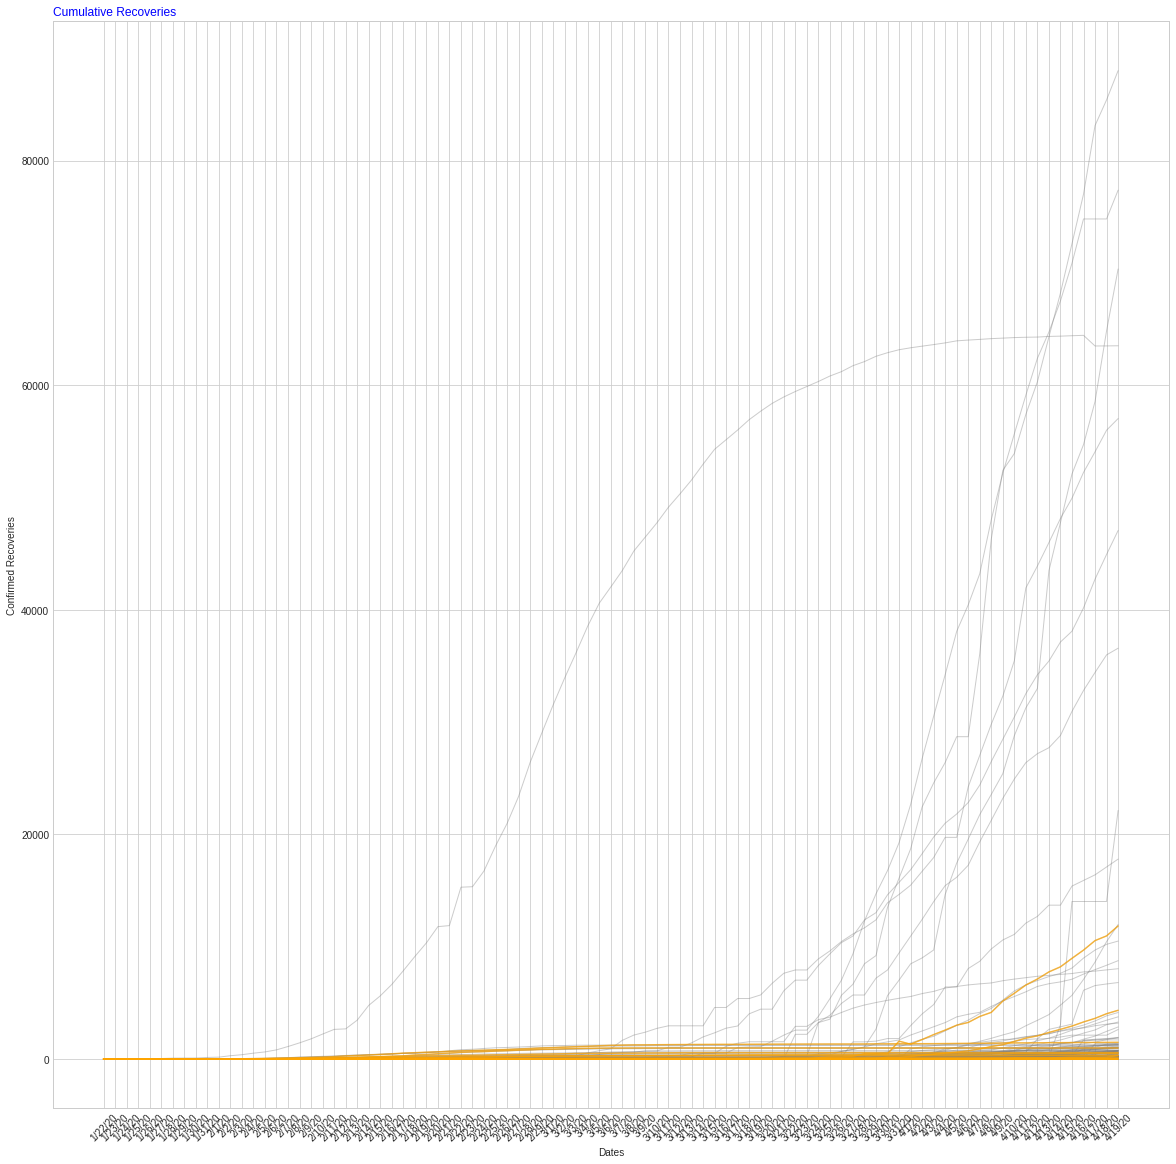

In [70]:
## Recovery
dfrecovered = pd.read_csv("time_series_covid19_recovered_global.csv")
dfrecovered = dfrecovered[dfrecovered['Country/Region'] != 'Diamond Princess']
dfrecovered = dfrecovered[dfrecovered['Country/Region'] != 'MS Zaandam']
dfrecovered = dfrecovered[dfrecovered['Province/State'] != 'Grand Princess']

## Figures 

figdat = dfrecovered.copy()
figdat = figdat.drop(['Province/State', 	'Country/Region', 	'Lat', 	'Long'], axis = 1)


## Figures

# multiple line plot
for index, row in figdat.iterrows():
  plt.plot(figdat.columns, row['1/22/20':], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but bigger with distinct color


for i in list(dfconfirmed.index[dfconfirmed['Country/Region'] == "Canada"]):
  figdat.iloc[i].plot(marker='', color='orange', linewidth=1.5, alpha=0.7)

plt.xticks(rotation=45)

plt.title("Cumulative Recoveries", loc='left', fontsize=12, fontweight=0, color='blue')
plt.xlabel("Dates")
plt.ylabel("Confirmed Recoveries")

In [0]:
## Recovery Math
dfrecovered = dfrecovered.drop(['Lat', 'Long'], axis = 1)
dates = dfrecovered.copy()

dates = dates.drop(['Province/State','Country/Region'], axis = 1)
dates.head()

# Days since first infection
df = dates.astype(float)
firstrec = np.argmax(df.values!=0,axis=1)

#first infection as a calendar day of the year
firstrec_doy = firstdeath + 22 # this would muck up the data because 0's mean they were there before the data was started

# Number of days prior to a Pandemic being called, where the first confirmed cases appear
# March 11th is day 71 of 2020
recpriortopandemic = 71 - firstrec

# print(deathpriortopandemic)

### Global Population Data 
One more aspect of virus transmission that is important to include is how close individuals are to each other at any given time. To approximate this, we will look at total populations, urban populations, and population densities found on kaggle (https://www.kaggle.com/tanuprabhu/population-by-country-2020). The percentage of urban populations is included because those individuals will, by definition, be more likely to come in contact with new people in any given day. 

In [72]:

globalpops = pd.read_csv("population_by_country_2020.csv")

globalpop_reduced = globalpops.drop(['Yearly Change',
       'Net Change', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'World Share'], axis = 1)
globalpop_reduced.head()

,Country (or dependency),Population (2020),Density (P/Km²),Urban Pop %
0,China,1438116346,153,0.61
1,India,1377011281,464,0.35
2,United States,330578810,36,0.83
3,Indonesia,272884327,151,0.56
4,Pakistan,219922471,287,0.35


In [73]:
countriesCOVID = list(dfconfirmed['Country/Region'])
countriesKAGGLE = list(globalpop_reduced['Country (or dependency)'])


# prints the missing and additional elements in list2  
print("Missing values in Kaggle list:", (set(countriesCOVID).difference(countriesKAGGLE))) 
print("Additional values in Kaggle list:", (set(countriesKAGGLE).difference(countriesCOVID))) 

# adapted from: https://www.geeksforgeeks.org/python-find-missing-additional-values-two-lists/

Missing values in Kaggle list: {'Saint Vincent and the Grenadines', 'Congo (Kinshasa)', 'Taiwan*', 'Czechia', "Cote d'Ivoire", 'Korea, South', 'Congo (Brazzaville)', 'Saint Kitts and Nevis', 'Kosovo', 'West Bank and Gaza', 'Sao Tome and Principe', 'Burma', 'US'}
Additional values in Kaggle list: {'Guam', 'Puerto Rico', 'Isle of Man', 'Réunion', 'Micronesia', 'French Polynesia', 'Curaçao', 'Northern Mariana Islands', 'St. Vincent & Grenadines', 'Marshall Islands', 'Mayotte', 'South Korea', 'Tonga', 'Saint Pierre & Miquelon', 'Tuvalu', 'Saint Kitts & Nevis', 'Solomon Islands', 'Turks and Caicos', 'Cayman Islands', 'Saint Helena', 'Taiwan', 'Congo', 'North Korea', 'Myanmar', 'Sao Tome & Principe', 'Hong Kong', "Côte d'Ivoire", 'American Samoa', 'U.S. Virgin Islands', 'Cook Islands', 'Faeroe Islands', 'Aruba', 'Palau', 'DR Congo', 'Greenland', 'Kiribati', 'Tajikistan', 'Comoros', 'British Virgin Islands', 'Anguilla', 'State of Palestine', 'Niue', 'Macao', 'Montserrat', 'Vanuatu', 'Tokelau'

Because the countries do not match in several cases, we have to find equivalencies (i.e. different spellings, or antiquated names such as Burma or Mayanmar) found between the datasets before we can merge the two. 


In [0]:
globalpop_reduced['Country (or dependency)'] = globalpop_reduced['Country (or dependency)'].replace(
    ['DR Congo','Congo'	, 'Czechia',	 "Cote d'Ivoire",	 'Korea, South',	 'US',	 'West Bank and Gaza',	 
    'Taiwan*',	 'Saint Vincent and the Grenadines',	 'Sao Tome and Principe',	 'Saint Kitts and Nevis',	 'Burma' ],
  ['Congo (Kinshasa)',	 'Congo (Brazzaville)',	 'Czech Republic (Czechia)',	 "Côte d'Ivoire",	 'South Korea',	 'United States',
    'State of Palestine',	 'Taiwan',	 'St. Vincent & Grenadines',	 'Sao Tome & Principe',	 'Saint Kitts & Nevis',	 'Myanmar']) 

### Canadian Statistics 
To calculate urbanisation in Canadian provinces, we need to extract the populations of those provinces from statistics Canada. However the closest data that we can obtain is from 2018 and will only serve as an approximation. Other information from the same site has shown that the urbanisation trend within Canada has stabilized (https://www12.statcan.gc.ca/census-recensement/2011/as-sa/98-310-x/98-310-x2011003_2-eng.cfm), as well as from other sources (https://www.statista.com/statistics/271208/urbanization-in-canada/), therefore, we are reasonable certain that this approximation will serve our purposes. 

In [0]:
canurbanpop = pd.read_csv("t001b-eng.csv", skiprows = 5)
# Found at https://www150.statcan.gc.ca/n1/daily-quotidien/190328/t001b-eng.csv



canurbanpop = canurbanpop.rename(columns = {'All census metropolitan areas': 'urbs', '26497722': 'pops'})
# need to drop some useless rows
canurbanpop = canurbanpop.drop([39, 37, 38])

# add in a column for each province to which the urban locale belongs. 
canurbanpop['prov'] = ['British Columbia', 'Ontario', 'Ontario', 'Ontario', 'Alberta', 'Alberta', 'Ontario', 'Ontario', 'Nova Scotia', 
 'Ontario', 'British Columbia', 'Ontario', 'Ontario', 'Alberta', 'Ontario', 'New Brunswick', 'Quebec', 
 'Ontario', np.nan, 'Ontario', 'Quebec', 'Ontario', 'Quebec', 'Saskatchewan', 'Quebec', 'New Brunswick', 'Saskatchewan',
 'Quebec', 'Ontario', 'Newfoundland', 'Ontario', 'Ontario', 'Quebec', 'British Columbia', 'British Columbia', 'Ontario', 'Manitoba']


# Sum totals of urban populations by province
provurbpops = pd.DataFrame(canurbanpop.groupby(['prov']).sum())

In [0]:
provurbpops = pd.DataFrame(provurbpops)
provurbpops['provs'] = provurbpops.index


Due to the temporal disparity between the surveys, we will need to perform another round of estimating: this time for the percentage of population that belongs in urban centres in 2020, extrapolating from the 2018 data. Based on the flat trend in proportional urbanization, we will algebraically extend this percentage to the updated 2020 population. 

In [0]:
# Pulled from password protected file -- Read Only Version: https://www150.statcan.gc.ca/n1/en/catalogue/91-002-X

colnames = ['Newfoundland',	'P.E.I.',	'Nova Scotia',	'New Brunswick',	'Quebec',	'Ontario',	'Manitoba',	'Saskatchewan',	'Alberta',	
            'British Columbia', 'Yukon', 	'Northwest Territories', 	'Nunavut']
rw2018 = [527595,	151648,	954397,	768309,	8342243,	14188919,	1344864,	1157543,	4270923,	4959616, 40019,	45062,	37694]	
rw2020 = [521365,	158158,	977457,	779993,	8537674,	14711827,	1377517,	1181666,	4413146,	5110917, 41078,	44904,	39097
]	

d = {'provs': colnames, 'pop2018': rw2018, 'pop2020': rw2020}

d = pd.DataFrame(d)

# surface areas of each province
# Chepkemoi, Joyce. "The Largest And Smallest Canadian Provinces/Territories By Area." WorldAtlas, Aug. 8, 2019, worldatlas.com/articles/the-largest-and-smallest-canadian-provinces-territories-by-area.html.
# Province or Territory	Land Area (sq km)
surf = pd.DataFrame({'provs': ['Nunavut', 'Quebec', 'Northwest Territories', 'British Columbia', 'Alberta', 'Ontario', 'Saskatchewan', 
                  'Manitoba', 'Yukon', 'Newfoundland', 'New Brunswick', 'Nova Scotia','P.E.I.'], 
                  'surface': [1936113, 1365128, 1183085, 925186, 917741, 642317, 591670, 553556, 474391, 373872, 71450, 53338, 5660]})

#Merge the dataframes
canpops = provurbpops.merge(d, left_on = 'provs', right_on = 'provs', how = 'outer')
canpops = canpops.merge(surf, left_on = 'provs', right_on = 'provs', how = 'outer')


In [0]:
pd.set_option('display.float_format', '{:.2f}'.format)
canpops['urbpop2018'] = canpops['pops'] / canpops['pop2018']
canpops.columns = ['urbanpops2018' ,	'provs' ,	'pop2018', 	'pop2020' ,	'surface' ,	'urbpop2018percent']
canpops['density2020'] = canpops['pop2020'] / canpops['surface']


In [79]:
canpops = canpops.fillna(0)
canpops_reduced = canpops.drop(['pop2018', 'surface'], axis = 1)
canpops_reduced['pop2020'][canpops_reduced['provs'] == "Alberta"]
canpops_reduced['provs'][canpops_reduced['provs'] == "P.E.I."] = "Prince Edward Island"
canpops_reduced

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,urbanpops2018,provs,pop2020,urbpop2018percent,density2020
0,3031519.00,Alberta,4413146,0.71,4.81
1,3453846.00,British Columbia,5110917,0.70,5.52
2,832186.00,Manitoba,1377517,0.62,2.49
3,282711.00,New Brunswick,779993,0.37,10.92
4,212501.00,Newfoundland,521365,0.40,1.39
5,430512.00,Nova Scotia,977457,0.45,18.33
6,11721786.00,Ontario,14711827,0.83,22.90
7,5952756.00,Quebec,8537674,0.71,6.25
8,579905.00,Saskatchewan,1181666,0.50,2.00
9,0.00,Prince Edward Island,158158,0.00,27.94


As we can see, there are no urban populations in Prince Edward Island, or the territories, this may reflect their lower infection rates, and justify including these variables in the overall model. 

For other countries, we will need to approximate urbanisation as a mean across the entire country due to time constraints and feasibility. Exhaustive searching did you reveal a composite dataset with provincial/state population densities and urbanisation. Given more time, this would be an interesting avenue to explore, but goes beyond the scope of this project. 


### Joining the datasets and Final Preparations 

In [0]:
## Confirmed cases

from decimal import Decimal


## Confirmed Cases
globalpop_reduced.columns = ['country', 'pop2020', 'density2020', 'urbpoppercent']


dfconfirmed['daysPreWHO'] = infectpriortopandemic
dfconfpops = dfconfirmed.merge(globalpop_reduced, left_on = 'Country/Region', right_on = 'country', how = 'outer')


# REMOVE COUNTRY NANS
dfconfpops = dfconfpops[dfconfpops['Country/Region'].notna()]


## Add in the Canadian Provinces
provinces = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 
             'Nova Scotia', 'Ontario', 'Quebec' , 'Saskatchewan', 'Prince Edward Island', 
             'Yukon', 'Northwest Territories', 'Nunavut']
for province in provinces: 
  dfconfpops['pop2020'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = int(canpops_reduced['pop2020'][canpops_reduced['provs'] == province])
  dfconfpops['density2020'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = list(canpops_reduced['density2020'][canpops_reduced['provs'] == province])
  dfconfpops['urbpoppercent'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = list(canpops_reduced['urbpop2018percent'][canpops_reduced['provs'] == province])


# Adapted from
# https://stackoverflow.com/questions/25895154/python-pandas-if-value-in-column-b-equals-x-y-z-replace-column-a-with-t
# df['A'] = np.where(df.B.isin(['X','Y','Z']),'T', df['A'])


In [0]:
dfconfpops = dfconfpops.drop(['1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', 'country'], axis = 1)

And here is what we have made thus far for the confirmed cases:

In [82]:
dfconfpops

,Province/State,Country/Region,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,daysPreWHO,pop2020,density2020,urbpoppercent
0,NaN,Afghanistan,7.00,7.00,7.00,11.00,16.00,21.00,22.00,22.00,22.00,24.00,24.00,40.00,40.00,74.00,84.00,94.00,110.00,110.00,120.00,170.00,174.00,237.00,273.00,281.00,299.00,349.00,367.00,423.00,444.00,484.00,521.00,555.00,607.00,665.00,714.00,784.00,840.00,906.00,933.00,996.00,38.00,38728504.00,60.00,0.25
1,NaN,Albania,12.00,23.00,33.00,38.00,42.00,51.00,55.00,59.00,64.00,70.00,76.00,89.00,104.00,123.00,146.00,174.00,186.00,197.00,212.00,223.00,243.00,259.00,277.00,304.00,333.00,361.00,377.00,383.00,400.00,409.00,416.00,433.00,446.00,467.00,475.00,494.00,518.00,539.00,548.00,562.00,24.00,2878471.00,105.00,0.63
2,NaN,Algeria,20.00,24.00,26.00,37.00,48.00,54.00,60.00,74.00,87.00,90.00,139.00,201.00,230.00,264.00,302.00,367.00,409.00,454.00,511.00,584.00,716.00,847.00,986.00,1171.00,1251.00,1320.00,1423.00,1468.00,1572.00,1666.00,1761.00,1825.00,1914.00,1983.00,2070.00,2160.00,2268.00,2418.00,2534.00,2629.00,37.00,43672620.00,18.00,0.73
3,NaN,Andorra,1.00,1.00,1.00,1.00,1.00,2.00,39.00,39.00,53.00,75.00,88.00,113.00,133.00,164.00,188.00,224.00,267.00,308.00,334.00,370.00,376.00,390.00,428.00,439.00,466.00,501.00,525.00,545.00,564.00,583.00,601.00,601.00,638.00,646.00,659.00,673.00,673.00,696.00,704.00,713.00,31.00,77238.00,164.00,0.88
4,NaN,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,2.00,3.00,3.00,3.00,4.00,4.00,5.00,7.00,7.00,7.00,8.00,8.00,8.00,10.00,14.00,16.00,17.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,24.00,24.00,13.00,32627944.00,26.00,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,NaN,Malawi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,4.00,4.00,5.00,8.00,8.00,8.00,9.00,12.00,13.00,16.00,16.00,16.00,16.00,17.00,17.00,17.00,0.00,19016296.00,203.00,0.18
257,NaN,South Sudan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,2.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,-3.00,11164632.00,18.00,0.25
258,NaN,Western Sahara,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,-3.00,593973.00,2.00,0.87
259,NaN,Sao Tome and Principe,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,-4.00,nan,nan,nan


In [0]:
# Reformat some columns
dfconfpops = dfconfpops.reindex(columns = ['Country/Region', 'Province/State', 
       'daysPreWHO', 'pop2020', 'density2020', 'urbpoppercent', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', 
       '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20'])



We have dropped the columns for the data prior to the pandemic declaration by the WHO. We assume that the pattern of spread prior to the declaration and post-declaration will likely show different patterns: Social distancing was adopted, sports were cancelled, governments started moving towards action. Therefore, we record the number of days prior to this date that the infection could spread, but attempt to track one type of spreading phenomenon. 

Then, for Canada, we need to date-shift the provinces. We are going to shift all of the provinces so that the values are 3 days ahead of the date recorded. Thereby, we can use the relative values of Canadian provinces and other countries around the world, using the most recent data from those countries as though it will be in the future by three days. 

In [0]:
# Date shift the Canadian provinces so the last three available dates for other countries can be used to predict the next three days of provinces
provinces = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 
             'Nova Scotia', 'Ontario', 'Quebec' , 'Saskatchewan', 'Prince Edward Island', 
             'Yukon', 'Northwest Territories', 'Nunavut']
for province in provinces: 
  dfconfpops['3/11/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/14/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/12/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/15/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/13/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/16/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/14/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/17/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/15/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/18/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/16/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/19/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/17/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/20/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/18/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/21/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/19/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/22/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/20/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/23/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/21/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/24/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/22/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/25/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/23/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/26/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/24/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/27/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/25/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/28/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/26/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/29/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/27/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/30/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/28/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['3/31/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/29/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/1/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/30/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/2/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['3/31/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/3/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/1/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/4/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/2/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/5/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/3/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/6/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/4/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/7/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/5/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/8/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/6/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/9/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/7/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/10/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/8/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/11/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/9/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/12/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/10/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/13/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/11/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/14/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/12/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/15/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/13/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/16/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/14/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/17/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/15/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/18/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  dfconfpops['4/16/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)] = dfconfpops['4/19/20'][(dfconfpops['Country/Region'] == "Canada") & (dfconfpops['Province/State'] == province)]
  

At this point, it's prudent to pause and perform the same actions for both the deaths dataset and the recovered dataset

In [0]:
## Deaths
from decimal import Decimal


dfdeaths['daysPreWHO'] = deathpriortopandemic
dfdeathpops = dfdeaths.merge(globalpop_reduced, left_on = 'Country/Region', right_on = 'country', how = 'outer')


# REMOVE COUNTRY NANS
dfdeathpops = dfdeathpops[dfdeathpops['Country/Region'].notna()]


## Add in the Canadian Provinces
provinces = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 
             'Nova Scotia', 'Ontario', 'Quebec' , 'Saskatchewan', 'Prince Edward Island', 
             'Yukon', 'Northwest Territories', 'Nunavut']
for province in provinces: 
  dfdeathpops['pop2020'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = int(canpops_reduced['pop2020'][canpops_reduced['provs'] == province])
  dfdeathpops['density2020'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = list(canpops_reduced['density2020'][canpops_reduced['provs'] == province])
  dfdeathpops['urbpoppercent'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = list(canpops_reduced['urbpop2018percent'][canpops_reduced['provs'] == province])


# Adapted from
# https://stackoverflow.com/questions/25895154/python-pandas-if-value-in-column-b-equals-x-y-z-replace-column-a-with-t
# df['A'] = np.where(df.B.isin(['X','Y','Z']),'T', df['A'])


dfdeathpops = dfdeathpops.drop(['1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', 'country'], axis = 1)
	   
	   
	   
	   
	   
dfdeathpops = dfdeathpops.reindex(columns = ['Country/Region', 'Province/State', 
       'daysPreWHO', 'pop2020', 'density2020', 'urbpoppercent', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', 
       '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20'])



# Date shift the Canadian provinces so the last three available dates for other countries can be used to predict the next three days of provinces
provinces = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland', 
             'Nova Scotia', 'Ontario', 'Quebec' , 'Saskatchewan', 'Prince Edward Island', 
             'Yukon', 'Northwest Territories', 'Nunavut']
for province in provinces: 
  dfdeathpops['3/11/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/14/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/12/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/15/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/13/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/16/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/14/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/17/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/15/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/18/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/16/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/19/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/17/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/20/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/18/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/21/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/19/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/22/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/20/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/23/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/21/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/24/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/22/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/25/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/23/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/26/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/24/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/27/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/25/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/28/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/26/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/29/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/27/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/30/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/28/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['3/31/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/29/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/1/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/30/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/2/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['3/31/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/3/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/1/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/4/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/2/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/5/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/3/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/6/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/4/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/7/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/5/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/8/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/6/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/9/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/7/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/10/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/8/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/11/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/9/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/12/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/10/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/13/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/11/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/14/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/12/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/15/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/13/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/16/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/14/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/17/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/15/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/18/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]
  dfdeathpops['4/16/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)] = dfdeathpops['4/19/20'][(dfdeathpops['Country/Region'] == "Canada") & (dfdeathpops['Province/State'] == province)]





Below, we will need to make a few modifications for the recovered dataset, compared to previous code sections, because they did not include the provinces here

In [86]:
dfrecovered[dfrecovered['Country/Region'] == 'Canada']

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
36,NaN,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,6,6,...,8,8,8,8,8,9,9,9,9,9,10,10,10,110,183,184,256,466,466,466,1592,1324,1735,2175,2577,3012,3256,3791,4154,5162,5855,6589,7123,7758,8210,8966,9698,10545,10964,11847


In [0]:
## Recoveries
dfrecovered['daysPreWHO'] = recpriortopandemic

# REMOVE COUNTRY NANS
dfrecpops = dfrecovered.merge(globalpop_reduced, left_on = 'Country/Region', right_on = 'country', how = 'outer')

dfrecpops = dfrecpops[dfrecpops['Country/Region'].notna()]
dfrecpops[dfrecpops['Country/Region'] == "Canada"]


dfrecpops = dfrecpops.drop(['1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', 'country'], axis = 1)
	   
	   
	   
	   
	   
dfrecpops = dfrecpops.reindex(columns = ['Country/Region', 'Province/State', 
       'daysPreWHO', 'pop2020', 'density2020', 'urbpoppercent', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', 
       '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20'])






## Date shift the country
dfrecpops['3/11/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/14/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/12/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/15/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/13/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/16/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/14/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/17/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/15/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/18/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/16/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/19/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/17/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/20/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/18/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/21/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/19/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/22/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/20/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/23/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/21/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/24/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/22/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/25/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/23/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/26/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/24/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/27/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/25/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/28/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/26/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/29/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/27/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/30/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/28/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['3/31/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/29/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/1/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/30/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/2/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['3/31/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/3/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/1/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/4/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/2/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/5/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/3/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/6/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/4/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/7/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/5/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/8/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/6/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/9/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/7/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/10/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/8/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/11/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/9/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/12/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/10/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/13/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/11/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/14/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/12/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/15/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/13/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/16/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/14/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/17/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/15/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/18/20'][(dfrecpops['Country/Region'] == "Canada")]
dfrecpops['4/16/20'][(dfrecpops['Country/Region'] == "Canada")] = dfrecpops['4/19/20'][(dfrecpops['Country/Region'] == "Canada")]




## Training a model

Here, we will use an Elastic Net type regressions. Because we've removed the data prior to the WHO declaration, we believe that the data can be modelled using a linear regression type method. We chose Elastic Net type regressions because they are a hybrid of other types (Ridge and Lasso) and could modify the penalty on large coefficients by the weighting. The reasoning behind this approach was that we have the population in the country in the same data as the infections, which are orders of magnitude different. If one became overly dominant, we wanted to be able to penalize that somewhat. 

In [0]:
dfconfpops = dfconfpops[~dfconfpops['Province/State'].isin(['Diamond Princess', 'Recovered', 'Northwest Territories', 'Yukon'])]
dfconfpops = dfconfpops.reset_index()
dfconfpops = pd.DataFrame(dfconfpops.drop('index', axis = 1))

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

dataset = dfconfpops.copy()
dataset = dataset.dropna(axis = 0, subset = ['pop2020'])
dataset = dataset.reset_index()
dataset = pd.DataFrame(dataset.drop('index', axis = 1))
dataset

X = dataset[['daysPreWHO', 'pop2020',
       'density2020', 'urbpoppercent', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20']] #exclude provinces and countries, but we need everything up to the last three columns
y = dataset[['4/17/20', '4/18/20', '4/19/20']] #the last three columns will be our most recent dates from other countries and predictable data from Canada
X = X.replace('', float('NaN'))



In [0]:
testrows = dataset.index[dataset['Country/Region'] == "Canada"].tolist()
trainrows = dataset.index[dataset['Country/Region'] != "Canada"].tolist()

# Impute means into nans
# Imputing was originally included, but led to much worse predictions
# impcont = SimpleImputer(missing_values=np.nan, strategy='mean')
# impcont.fit(X)
# X_compcont = pd.DataFrame(impcont.transform(X))

#Scaling
X_comp_scaled = pd.DataFrame(preprocessing.scale(X))


In [91]:
# Ensure that the datasets are the right shape
print(X_comp_scaled.shape)
print(y.shape)


(246, 41)
(246, 3)


In [0]:
# Splitting the dataset into the Training set and Test set

X_train = X_comp_scaled.iloc[(trainrows)]
X_test = X_comp_scaled.iloc[testrows]

y_train = y.loc[trainrows]
y_test = y.loc[testrows]

Because we extracted all three columns pertaining to the days that we want to predict into y_train, we cannot just train a model. We will fit three models, one for each day

### Training April 20th models

In [93]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures

y_train1 = y_train['4/17/20']
y_test1 = y_test['4/17/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train1)
print("alpha: {}\nl1_ratio: {}".format(en.alpha_, en.l1_ratio_))

alpha: 48.811386724381194
l1_ratio: 0.5


In [0]:
from sklearn import metrics


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train1)
y_pred1 = en.predict(X_test)

In [95]:
y_pred1

array([ 4457.46237915,  4680.68171185,  3480.07380472,  3330.8331046 ,
        3527.98546138,  3505.75180452,  7449.05131671,  3112.29396202,
       10193.79646465,  3487.46785914])

### Training April 21 Models

In [96]:
y_train2 = y_train['4/18/20']
y_test2 = y_test['4/18/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train2)
print("alpha: {}\nl1_ratio: {}".format(en.alpha_, en.l1_ratio_))

alpha: 49.604758193179045
l1_ratio: 0.5


In [0]:
# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train2)
y_pred2 = en.predict(X_test)


In [98]:
y_pred2

array([ 4629.87516568,  4856.13489475,  3645.2283667 ,  3493.82504341,
        3694.29743468,  3670.11618667,  7645.52387553,  3271.74163933,
       10406.20538877,  3652.00879626])

### Training April 22 Models

In [99]:
y_train3 = y_train['4/19/20']
y_test3 = y_test['4/19/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train3)
print("alpha: {}\nl1_ratio: {}".format(en.alpha_, en.l1_ratio_))

alpha: 51.043845914708044
l1_ratio: 0.5


In [0]:
# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train3)
y_pred3 = en.predict(X_test)


In [101]:
y_pred3

array([ 4843.6449301 ,  5073.86354408,  3846.57046454,  3692.5226242 ,
        3896.84711958,  3871.05838939,  7901.39992231,  3466.19352227,
       10694.52685315,  3852.8896495 ])

### Convert Predictions to a single table

In [102]:
provincessel = dataset.iloc[testrows]['Province/State']

confirmed_predictions = pd.DataFrame(list(zip(provincessel,y_pred1, y_pred2, y_pred3)),
             columns = ["Province", "April20", "April21", "April22"])
q = confirmed_predictions.sum(axis=0)
confirmed_predictions = confirmed_predictions.append(q, ignore_index=True) 
confirmed_predictions['Province'][10] = "Canada"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [103]:
confirmed_predictions

,Province,April20,April21,April22
0,Alberta,4457.46,4629.88,4843.64
1,British Columbia,4680.68,4856.13,5073.86
2,Manitoba,3480.07,3645.23,3846.57
3,New Brunswick,3330.83,3493.83,3692.52
4,Newfoundland and Labrador,3527.99,3694.30,3896.85
5,Nova Scotia,3505.75,3670.12,3871.06
6,Ontario,7449.05,7645.52,7901.40
7,Prince Edward Island,3112.29,3271.74,3466.19
8,Quebec,10193.80,10406.21,10694.53
9,Saskatchewan,3487.47,3652.01,3852.89


Next, we will need to perform the same calculations for both the deaths, and the recoveries. We will use separate models for each, but will not continue to walk through them. 

## Modelling the Deaths from COVID-19

In [0]:
dfdeathpops = dfdeathpops[~dfdeathpops['Province/State'].isin(['Diamond Princess', 'Recovered', 'Northwest Territories', 'Yukon'])]
dfdeathpops = dfdeathpops.reset_index()
dfdeathpops = pd.DataFrame(dfdeathpops.drop('index', axis = 1))

dataset = dfdeathpops.copy()
dataset = dataset.dropna(axis = 0, subset = ['pop2020'])
dataset = dataset.reset_index()
dataset = pd.DataFrame(dataset.drop('index', axis = 1))


X = dataset[['daysPreWHO', 'pop2020',
       'density2020', 'urbpoppercent', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20']] #exclude provinces and countries, but we need everything up to the last three columns
y = dataset[['4/17/20', '4/18/20', '4/19/20']] #the last three columns will be our most recent dates from other countries and predictable data from Canada
X = X.replace('', float('NaN'))


testrows = dataset.index[dataset['Country/Region'] == "Canada"].tolist()
trainrows = dataset.index[dataset['Country/Region'] != "Canada"].tolist()




#Scaling
X_comp_scaled = pd.DataFrame(preprocessing.scale(X))


# Splitting the dataset into the Training set and Test set
X_train = X_comp_scaled.iloc[(trainrows)]
X_test = X_comp_scaled.iloc[testrows]

y_train = y.loc[trainrows]
y_test = y.loc[testrows]


In [0]:
# First Day Prediction

y_train1 = y_train['4/17/20']
y_test1 = y_test['4/17/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train1)


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train1)
y_pred1 = en.predict(X_test)




# Second Day Prediction


y_train2 = y_train['4/18/20']
y_test2 = y_test['4/18/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train2)


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train2)
y_pred2 = en.predict(X_test)


# Third Day Prediction

y_train3 = y_train['4/19/20']
y_test3 = y_test['4/19/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train3)


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train3)
y_pred3 = en.predict(X_test)




provincessel = dataset.iloc[testrows]['Province/State']

deaths_predictions = pd.DataFrame(list(zip(provincessel,y_pred1, y_pred2, y_pred3)),
             columns = ["Province", "April20", "April21", "April22"])
q = deaths_predictions.sum(axis=0)
deaths_predictions = deaths_predictions.append(q, ignore_index=True) 


In [106]:
deaths_predictions['Province'][10] = "Canada"
deaths_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Province,April20,April21,April22
0,Alberta,155.08,165.30,173.90
1,British Columbia,183.33,193.84,202.73
2,Manitoba,107.65,116.42,123.98
3,New Brunswick,78.23,84.76,90.26
4,Newfoundland and Labrador,124.93,134.99,143.33
5,Nova Scotia,87.98,95.62,102.60
6,Ontario,453.87,471.97,486.86
7,Prince Edward Island,37.76,42.15,47.17
8,Quebec,501.91,521.24,536.98
9,Saskatchewan,95.27,103.22,110.32


### Modelling Recoveries from COVID-19

Attention should be taken in this section, as this data does not contain provinces. Therefore, we will only have a one line output. 

In [0]:
dataset = dfrecpops.copy()
dataset = dataset.dropna(axis = 0, subset = ['pop2020'])
dataset = dataset.reset_index()
dataset = pd.DataFrame(dataset.drop('index', axis = 1))



X = dataset[['daysPreWHO', 'pop2020',
       'density2020', 'urbpoppercent', '3/11/20', '3/12/20', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20',
       '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20',
       '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20',
       '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20',
       '4/14/20', '4/15/20', '4/16/20']] #exclude provinces and countries, but we need everything up to the last three columns
y = dataset[['4/17/20', '4/18/20', '4/19/20']] #the last three columns will be our most recent dates from other countries and predictable data from Canada
X = X.replace('', float('NaN'))




testrows = dataset.index[dataset['Country/Region'] == "Canada"].tolist()
trainrows = dataset.index[dataset['Country/Region'] != "Canada"].tolist()

#Scaling
X_comp_scaled = pd.DataFrame(preprocessing.scale(X))



# Splitting the dataset into the Training set and Test set

X_train = X_comp_scaled.iloc[(trainrows)]
X_test = X_comp_scaled.iloc[testrows]

y_train = y.loc[trainrows]
y_test = y.loc[testrows]

In [108]:
# First Day Prediction

y_train1 = y_train['4/17/20']
y_test1 = y_test['4/17/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train1)


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train1)
y_pred1 = en.predict(X_test)



# Second Day Prediction

y_train2 = y_train['4/18/20']
y_test2 = y_test['4/18/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train2)


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train2)
y_pred2 = en.predict(X_test)


# Third Day Prediction

y_train3 = y_train['4/19/20']
y_test3 = y_test['4/19/20']


en = linear_model.ElasticNetCV(cv=5, random_state=0)
en = en.fit(X_train, y_train3)


# evaluate on test data
alpha_sel = en.alpha_ # these calculate the vlaues that we will need for hyperparms
l1_sel = en.l1_ratio_
en = linear_model.ElasticNet(alpha=alpha_sel, l1_ratio=l1_sel) #these are the hyperparms
en = en.fit(X_train, y_train3)
y_pred3 = en.predict(X_test)





rec_predictions = pd.DataFrame(list(zip("Canada",y_pred1, y_pred2, y_pred3)),
             columns = ["Canada", "April20", "April21", "April22"])
rec_predictions['Canada'][0] = "Canada"


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Final Predictions: 


In [109]:
confirmed_predictions

,Province,April20,April21,April22
0,Alberta,4457.46,4629.88,4843.64
1,British Columbia,4680.68,4856.13,5073.86
2,Manitoba,3480.07,3645.23,3846.57
3,New Brunswick,3330.83,3493.83,3692.52
4,Newfoundland and Labrador,3527.99,3694.30,3896.85
5,Nova Scotia,3505.75,3670.12,3871.06
6,Ontario,7449.05,7645.52,7901.40
7,Prince Edward Island,3112.29,3271.74,3466.19
8,Quebec,10193.80,10406.21,10694.53
9,Saskatchewan,3487.47,3652.01,3852.89


In [0]:
confirmed_predictions.to_csv("confirmed_predicted.csv")

In [111]:
deaths_predictions

,Province,April20,April21,April22
0,Alberta,155.08,165.30,173.90
1,British Columbia,183.33,193.84,202.73
2,Manitoba,107.65,116.42,123.98
3,New Brunswick,78.23,84.76,90.26
4,Newfoundland and Labrador,124.93,134.99,143.33
5,Nova Scotia,87.98,95.62,102.60
6,Ontario,453.87,471.97,486.86
7,Prince Edward Island,37.76,42.15,47.17
8,Quebec,501.91,521.24,536.98
9,Saskatchewan,95.27,103.22,110.32


In [0]:
deaths_predictions.to_csv("deaths_predicted.csv")

In [113]:
rec_predictions

,Canada,April20,April21,April22
0,Canada,6521.59,6652.34,6832.93


In [0]:
rec_predictions.to_csv(" recovered_predicted.csv")